1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [29]:
#import useful modules/libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import scipy as sp

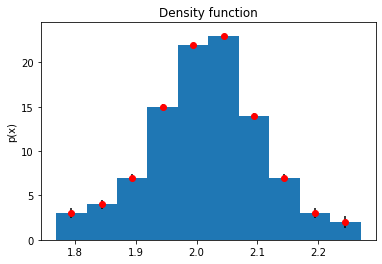

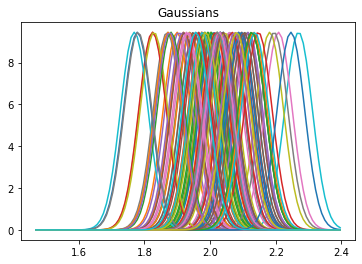

Text(0.5, 1.0, 'Normalized')

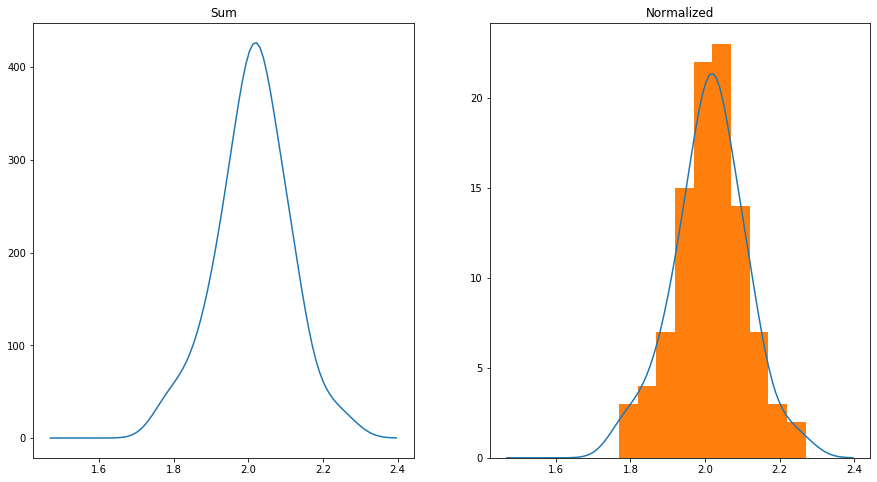

In [89]:
#Fill the numpy array
N = 100
mean = 2
std = 0.1
x = np.random.normal(mean, std, N)

#plot the histogram
fig, ax = plt.subplots()
#number of bins
n_bins = 10
n, bins, _ = ax.hist(x, n_bins)
#y labels
ax.set_ylabel("p(x)")
#y ticks (integers)
ax.locator_params(integer = True)
#compute points x coordinate
p = bins[:-1] + 0.5*(bins[1]-bins[0])
#draw points
ax.scatter(p,n,color = "r", zorder=10)
#show error bars
ax.errorbar(p, n, yerr=1/(n**0.5), fmt=".", ecolor="k")
ax.set_title("Density function")
plt.show()

#standard value of the parameter
std_def = 1.06 * std * N**(-1/5)
#x values for the gaussians
xv = np.linspace(np.min(x) - 3*std, np.max(x) + 3*std2, N)
#compute the gaussians
gaussians = np.array([sp.stats.norm.pdf(xv,el,std_def) for el in x])
for g in gaussians:
    plt.plot(xv,g)
plt.title("Gaussians")
plt.show()

#sum the gaussians
sum_g = np.sum(gaussians,axis=0)

#normalize
normalized = sum_g / sp.integrate.trapz(sum_g,xv) * N * (bins[1]-bins[0])

#plot the results to check
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(xv, sum_g)
ax[0].set_title("Sum")
ax[1].plot(xv, normalized)
ax[1].hist(x, n_bins)
ax[1].set_title("Normalized")

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [76]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
#from IPython.display import Image
#Image('two_categories_scatter_plot.png')

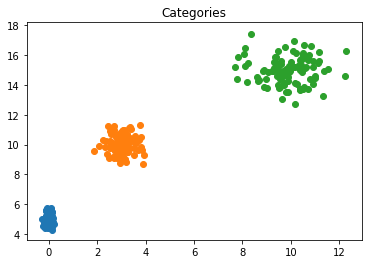

In [84]:
#Generate dataset function
def generate_dataset(means, stds, N, n_cat=2):
    data = np.zeros((N, 2, n_cat))
    for i in range(n_cat):
        data[:,0, i] = np.random.normal(means[i, 0], stds[i, 0], N)
        data[:, 1, i] = np.random.normal(means[i, 1], stds[i, 1], N)
    return data

#Generate dataset and pick the two categories
n_cat = 3
means = np.array([[0,5], [3,10], [10, 15]])
stds = np.array([[0.1, 0.3], [0.4, 0.7], [0.9, 0.9]])
data = generate_dataset(means, stds, 100, n_cat)

#draw scatter plot
for i in range(n_cat):
    plt.scatter(data[:,0,i],data[:,1,i])
plt.title("Categories")
plt.show()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

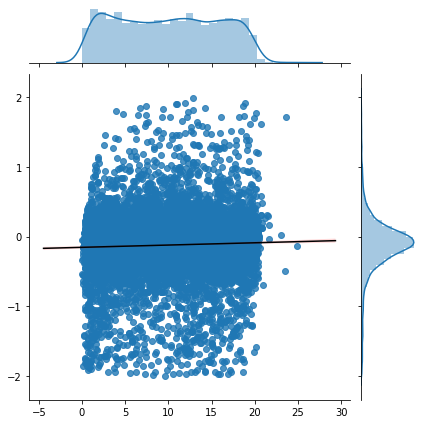

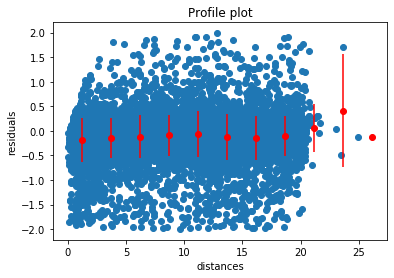

In [135]:
#load and inspect the dataset
path = 'C:/Users/franc/OneDrive/Desktop/Unipd/Magistrale/Terzo semestre/High Level Programming/data/residuals_261.npy'
data = pd.DataFrame(np.load(path, allow_pickle=True).item())
data.head()

#clean the dataset
data = data[abs(data['residuals']) < 2]
data.head()

#linear regression
res = data['residuals'].to_numpy()
dist = data['distances'].to_numpy()
reg = sp.stats.linregress(dist, res)

#plot with seaborn
plot = sns.jointplot(dist, res, kind="reg", joint_kws={'line_kws':{'color':'red'}})
#plot also the scipy regression
xr = plot.ax_joint.get_xlim()
y = np.array(xr)*reg[0]+reg[1]
plot.ax_joint.plot(xr, y, color='k')
plt.show()

#three np arrays
n_bins = 10
x = np.linspace(dist.min(),dist.max(),num=n_bins+1)
x = x + (x[1]-x[0])/2
data["bin"] = np.floor(data["distances"] / (x[1]-x[0]))
y = data.groupby('bin').mean()["residuals"]
erry = data.groupby('bin').std()["residuals"]

#plot
plt.scatter(dist,res)
plt.errorbar(x,y,erry,color="red",linestyle = 'none',marker="o")
plt.xlabel("distances")
plt.ylabel("residuals")
plt.title("Profile plot")
plt.show()